In [2]:
from google.colab import files

# Uploaded 3 selected videos (one real, one deepfake, one Face shifter)
uploaded = files.upload()


Saving 000_003 (1).mp4 to 000_003 (1).mp4
Saving 000_003.mp4 to 000_003.mp4
Saving 000.mp4 to 000.mp4


In [3]:
import os
#check the uploaded files
video_files = [f for f in os.listdir() if f.endswith('.mp4')]
print("Uploaded videos:", video_files)


Uploaded videos: ['000_003.mp4', '000.mp4', '000_003 (1).mp4']


In [9]:
#Frame extraction (video preprocessing: STEP 1)
import cv2

# Creating a folder to save frames
os.makedirs("frames", exist_ok=True)

for video in video_files:
    cap = cv2.VideoCapture(video)
    count = 0
    saved = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if count % 30 == 0:  # every 30th frame is saved
            out_path = f"frames/{video[:-4]}_frame{saved}.jpg"
            cv2.imwrite(out_path, frame)
            saved += 1

        count += 1

    cap.release()
    #prints a summary of how many frames were saved from each video
    print(f"{saved} frames saved from {video}")


14 frames saved from 000_003.mp4
14 frames saved from 000.mp4
14 frames saved from 000_003 (1).mp4


000_003_frame0.jpg


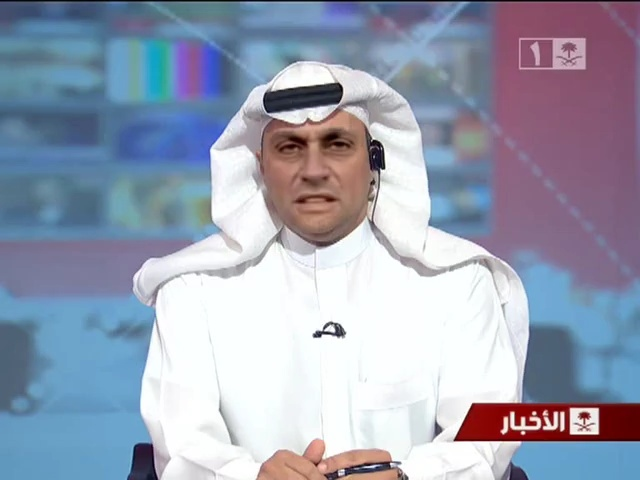

000_frame10.jpg


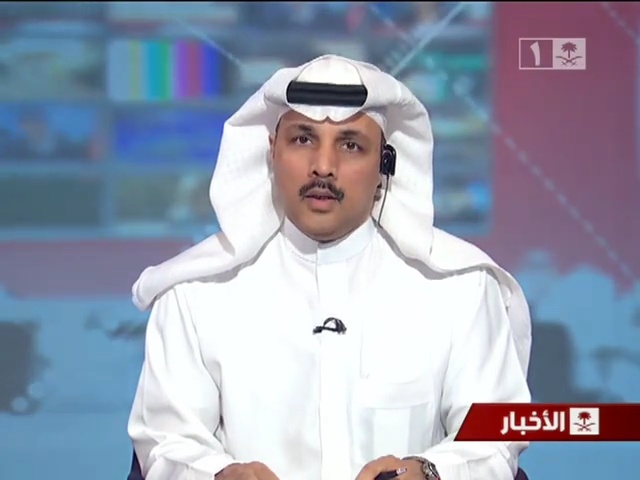

000_frame11.jpg


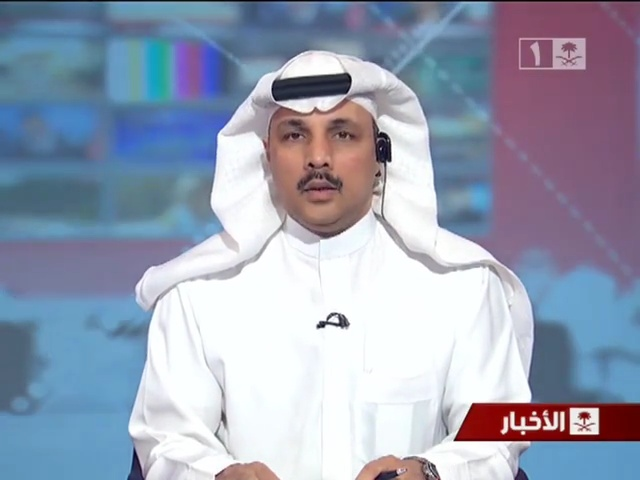

In [10]:
from IPython.display import Image, display
#displaying the first three jpg files in the directory frames
sample_images = [f for f in os.listdir("frames") if f.endswith('.jpg')][:3]

for img in sample_images:
    print(img)
    display(Image(filename=f"frames/{img}"))


In [13]:
# import cv2
# import os
#Face Detection and Cropping (video preprocessing: STEP 2)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Process each frame in 'frames' folder
for img_name in os.listdir("frames"):
    if not img_name.lower().endswith(".jpg"):
        continue

    img_path = os.path.join("frames", img_name)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print(f"No face found in {img_name}")
        continue

    os.makedirs("faces", exist_ok=True)

    # Take largest face detected
    x, y, w, h = max(faces, key=lambda rect: rect[2]*rect[3])
    face_img = img[y:y+h, x:x+w]

    # Save cropped face
    face_path = os.path.join("faces", img_name)
    cv2.imwrite(face_path, face_img)
    print(f"Cropped face saved to {face_path}")


Cropped face saved to faces/000_003_frame0.jpg
Cropped face saved to faces/000_frame10.jpg
Cropped face saved to faces/000_frame11.jpg
Cropped face saved to faces/000_frame13.jpg
Cropped face saved to faces/000_003 (1)_frame3.jpg
Cropped face saved to faces/000_003 (1)_frame1.jpg
Cropped face saved to faces/000_003_frame8.jpg
Cropped face saved to faces/000_frame6.jpg
Cropped face saved to faces/000_003 (1)_frame9.jpg
Cropped face saved to faces/000_003 (1)_frame11.jpg
Cropped face saved to faces/000_003 (1)_frame5.jpg
Cropped face saved to faces/000_003_frame11.jpg
Cropped face saved to faces/000_003_frame1.jpg
Cropped face saved to faces/000_003 (1)_frame13.jpg
Cropped face saved to faces/000_003_frame9.jpg
Cropped face saved to faces/000_003_frame5.jpg
Cropped face saved to faces/000_003 (1)_frame7.jpg
Cropped face saved to faces/000_003 (1)_frame12.jpg
Cropped face saved to faces/000_003 (1)_frame8.jpg
Cropped face saved to faces/000_frame8.jpg
Cropped face saved to faces/000_frame

In [14]:
#check the cropped faces which are saved in the file faces
print("Cropped face images:")
print(os.listdir("faces"))


Cropped face images:
['000_003_frame0.jpg', '000_frame10.jpg', '000_frame11.jpg', '000_frame13.jpg', '000_003 (1)_frame3.jpg', '000_003 (1)_frame1.jpg', '000_003_frame8.jpg', '000_frame6.jpg', '000_003 (1)_frame9.jpg', '000_003 (1)_frame11.jpg', '000_003 (1)_frame5.jpg', '000_003_frame11.jpg', '000_003_frame1.jpg', '000_003 (1)_frame13.jpg', '000_003_frame9.jpg', '000_003_frame5.jpg', '000_003 (1)_frame7.jpg', '000_003 (1)_frame12.jpg', '000_003 (1)_frame8.jpg', '000_frame8.jpg', '000_frame12.jpg', '000_003_frame12.jpg', '000_003 (1)_frame0.jpg', '000_003_frame6.jpg', '000_003_frame3.jpg', '000_003_frame13.jpg', '000_frame3.jpg', '000_003 (1)_frame2.jpg', '000_frame0.jpg', '000_frame2.jpg', '000_frame4.jpg', '000_003_frame7.jpg', '000_frame9.jpg', '000_003_frame4.jpg', '000_003 (1)_frame4.jpg', '000_frame1.jpg', '000_003 (1)_frame6.jpg', '000_003_frame2.jpg', '000_frame7.jpg', '000_frame5.jpg', '000_003_frame10.jpg', '000_003 (1)_frame10.jpg']


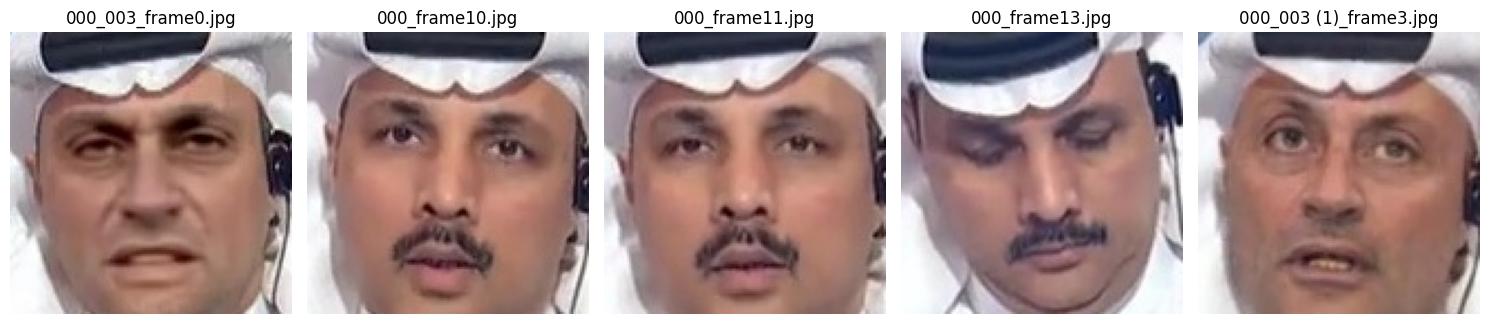

In [15]:
# import os
# import cv2
import matplotlib.pyplot as plt

# Path where cropped face images are stored
cropped_faces_path = "faces/"

# List some of the image files
face_files = [f for f in os.listdir(cropped_faces_path) if f.endswith('.jpg') or f.endswith('.png')]

# Show up to 5 face images
num_images_to_show = min(5, len(face_files))

plt.figure(figsize=(15, 5))

for i in range(num_images_to_show):
    img_path = os.path.join(cropped_faces_path, face_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converts BGR to RGB for correct color display

    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(img)
    plt.title(face_files[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [16]:
# import os
# import cv2

# Input and output paths
input_folder = "faces/"
output_folder = "faces_grayscale/"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all images in the input folder
for img_name in os.listdir(input_folder):
    if img_name.endswith(".jpg") or img_name.endswith(".png"):
        img_path = os.path.join(input_folder, img_name)

        # Read image in color
        img = cv2.imread(img_path)

        # Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Save grayscale image
        save_path = os.path.join(output_folder, img_name)
        cv2.imwrite(save_path, gray_img)

print(" Grayscale conversion completed. Saved in 'faces_grayscale/' folder.")


 Grayscale conversion completed. Saved in 'faces_grayscale/' folder.


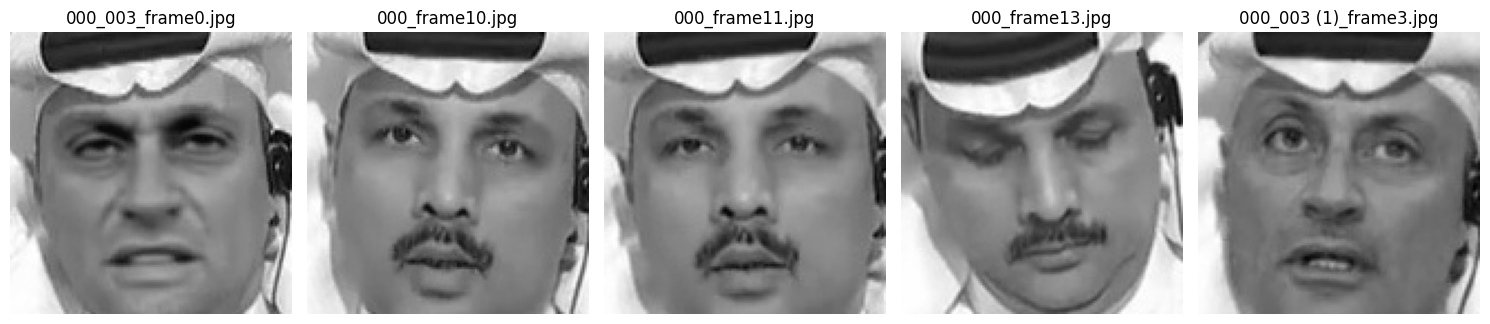

In [17]:
# import matplotlib.pyplot as plt
# import cv2
# import os

# Path to grayscale images
gray_folder = "faces_grayscale/"

# List of grayscale image files
gray_images = [img for img in os.listdir(gray_folder) if img.endswith('.jpg') or img.endswith('.png')]

# Show first 5 grayscale images (change number if needed)
num_to_show = min(5, len(gray_images))

plt.figure(figsize=(15, 5))
for i in range(num_to_show):
    img_path = os.path.join(gray_folder, gray_images[i])
    gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(1, num_to_show, i + 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title(gray_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


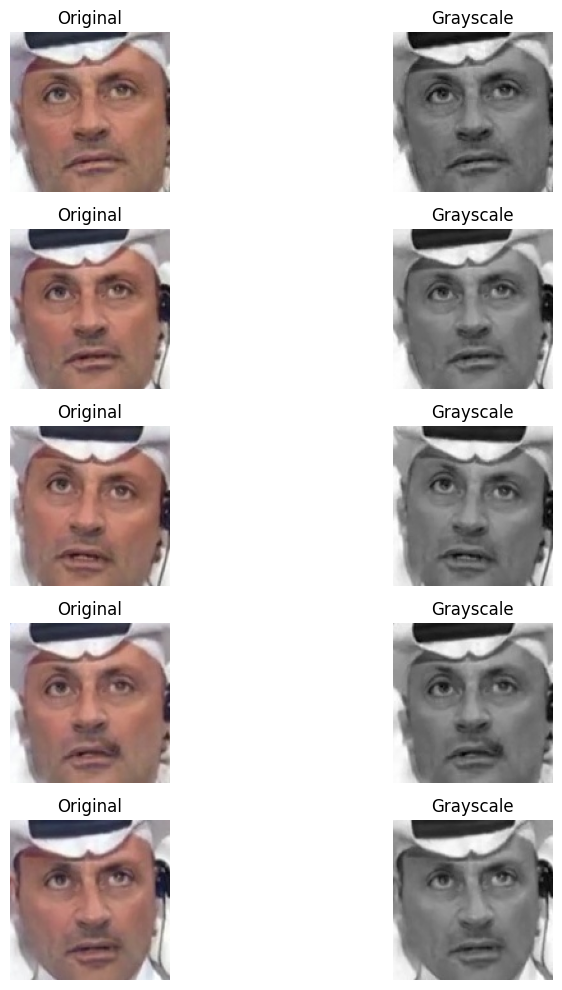

In [ ]:
#for side by side comparision of grayscal and original faces
import cv2
import os
import matplotlib.pyplot as plt

# Paths to the folders
original_folder = 'faces'
gray_folder = 'faces_grayscale'

# List of files (ensure both folders contain the same files)
original_images = sorted([f for f in os.listdir(original_folder) if f.endswith('.jpg') or f.endswith('.png')])
gray_images = sorted([f for f in os.listdir(gray_folder) if f.endswith('.jpg') or f.endswith('.png')])

# Show first 5 pairs
num_to_show = min(5, len(original_images), len(gray_images))

plt.figure(figsize=(10, 2 * num_to_show))

for i in range(num_to_show):
    orig_path = os.path.join(original_folder, original_images[i])
    gray_path = os.path.join(gray_folder, gray_images[i])

    # Read images
    orig_img = cv2.imread(orig_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

    gray_img = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)

    # Display Original
    plt.subplot(num_to_show, 2, 2 * i + 1)
    plt.imshow(orig_img)
    plt.title('Original')
    plt.axis('off')

    # Display Grayscale
    plt.subplot(num_to_show, 2, 2 * i + 2)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [18]:
# import cv2
# import os

# Define input and output folders
input_folder = 'faces'  # original face crops
output_folder = 'faces_resized'   # resized output

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define the target size (width, height)
target_size = (224, 224)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Read the image
        img = cv2.imread(img_path)

        # Resize the image
        resized_img = cv2.resize(img, target_size)

        # Save the resized image
        cv2.imwrite(output_path, resized_img)

print(" Frame resizing complete. Resized images are saved in 'faces_resized'.")


 Frame resizing complete. Resized images are saved in 'faces_resized'.


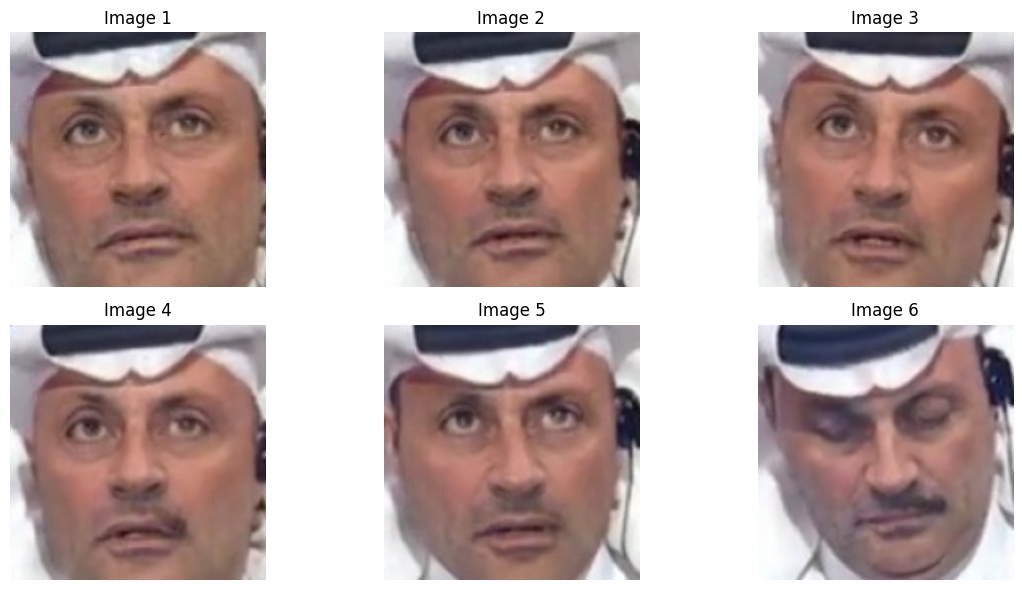

In [19]:
# import matplotlib.pyplot as plt
# import cv2
# import os

# Folder with resized images
resized_folder = 'faces_resized'

# List of image files
image_files = sorted([f for f in os.listdir(resized_folder) if f.endswith('.jpg') or f.endswith('.png')])

# Number of images to display
num_images = min(6, len(image_files))  # show up to 6 images

# Set up plot
plt.figure(figsize=(12, 6))

for i in range(num_images):
    img_path = os.path.join(resized_folder, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [20]:
#for temporal analysis (dynamic detection)
!pip install dlib
!pip install opencv-python
!pip install imutils


In [21]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils


In [22]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


--2025-05-16 06:51:06--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-05-16 06:51:06--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  34.4MB/s    in 1.8s    

2025-05-16 06:51:08 (34.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [23]:
def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of vertical eye landmarks (x, y)-coordinates
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    # compute the euclidean distance between the horizontal eye landmark (x, y)-coordinates
    C = np.linalg.norm(eye[0] - eye[3])
    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
    return ear



In [24]:
# Initialize dlib's face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Load your video path
video_path = "/content/000_003.mp4"  # Change to your actual video path
cap = cv2.VideoCapture(video_path)

ear_values = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret or frame_count > 200:  # limit to first 200 frames for speed
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)

    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # grab the indexes of the facial landmarks for the left and right eye
        (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
        (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]

        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)

        ear = (leftEAR + rightEAR) / 2.0
        ear_values.append(ear)

    frame_count += 1

cap.release()


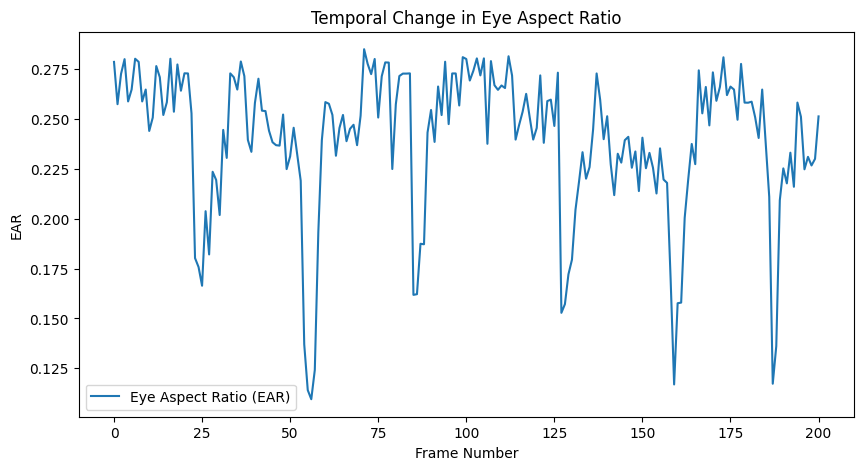

In [25]:
plt.figure(figsize=(10,5))
plt.plot(ear_values, label="Eye Aspect Ratio (EAR)")
plt.xlabel("Frame Number")
plt.ylabel("EAR")
plt.title("Temporal Change in Eye Aspect Ratio")
plt.legend()
plt.show()


In [26]:
import numpy as np

# Assuming ear_list is your list/array of EAR values computed frame by frame

EAR_THRESHOLD = 0.25  # typical threshold for closed eye
CONSEC_FRAMES = 2     # number of consecutive frames EAR should be below threshold to count as a blink

blink_count = 0
frame_counter = 0
blink_frames = []

for ear in ear_values:
    if ear < EAR_THRESHOLD:
        frame_counter += 1
    else:
        if frame_counter >= CONSEC_FRAMES:
            blink_count += 1
            blink_frames.append(frame_counter)  # how long the blink lasted
        frame_counter = 0

print(f"Total blinks detected: {blink_count}")

# Optional: calculate blink rate if you know video fps and duration
fps = 30  # replace with your video's fps
video_duration_sec = len(ear_values) / fps
blink_rate_per_min = blink_count / (video_duration_sec / 60)
print(f"Blink rate: {blink_rate_per_min:.2f} blinks per minute")


Total blinks detected: 13
Blink rate: 116.42 blinks per minute


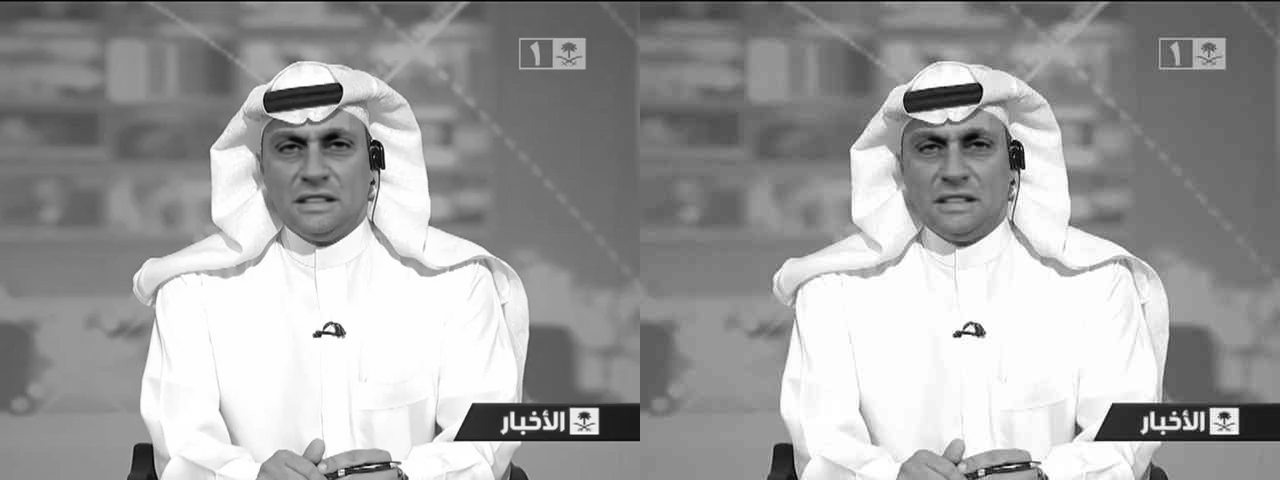

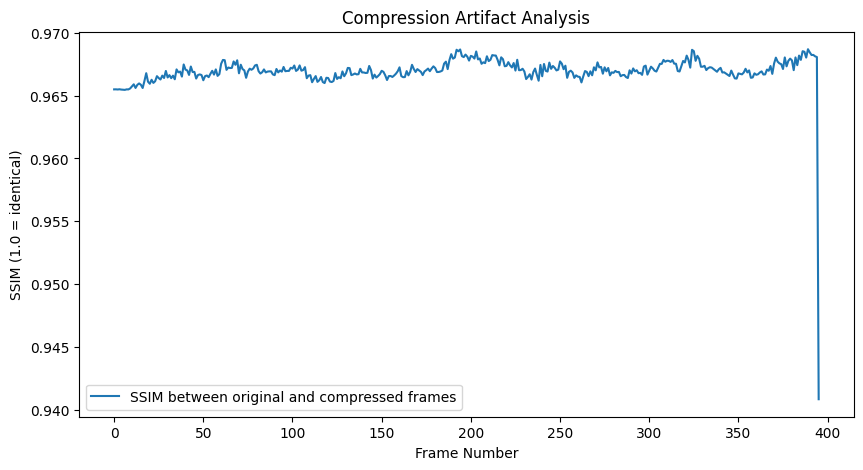

In [27]:
#compression artifact analysis
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Path to your video (replace with your actual video path)
video_path = '/content/000_003.mp4'

# Open the video
cap = cv2.VideoCapture(video_path)

ssim_values = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Encode frame to JPEG with low quality to simulate compression artifact
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 30]  # Quality from 0 to 100 (lower = more compression)
    result, encimg = cv2.imencode('.jpg', frame, encode_param)

    # Decode compressed image back to array
    decimg = cv2.imdecode(encimg, 1)

    # Convert to grayscale for SSIM comparison (better for luminance)
    gray_orig = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_comp = cv2.cvtColor(decimg, cv2.COLOR_BGR2GRAY)

    # Calculate SSIM between original and compressed frame
    score = ssim(gray_orig, gray_comp)
    ssim_values.append(score)

    # Optionally, display first frame and compressed frame side by side
    if frame_count == 1:
      from google.colab.patches import cv2_imshow
      combined = np.hstack((gray_orig, gray_comp))
      cv2_imshow(combined)  # Display images inline


cap.release()

# Plot SSIM values over frames
plt.figure(figsize=(10, 5))
plt.plot(ssim_values, label='SSIM between original and compressed frames')
plt.xlabel('Frame Number')
plt.ylabel('SSIM (1.0 = identical)')
plt.title('Compression Artifact Analysis')
plt.legend()
plt.show()


In [28]:
!zip -r deepfake_project.zip faces/ faces_grayscale/ faces_resized/ frames/


  adding: faces/ (stored 0%)
  adding: faces/000_003_frame0.jpg (deflated 2%)
  adding: faces/000_frame10.jpg (deflated 2%)
  adding: faces/000_frame11.jpg (deflated 2%)
  adding: faces/000_frame13.jpg (deflated 2%)
  adding: faces/000_003 (1)_frame3.jpg (deflated 3%)
  adding: faces/000_003 (1)_frame1.jpg (deflated 2%)
  adding: faces/000_003_frame8.jpg (deflated 2%)
  adding: faces/000_frame6.jpg (deflated 2%)
  adding: faces/000_003 (1)_frame9.jpg (deflated 3%)
  adding: faces/000_003 (1)_frame11.jpg (deflated 3%)
  adding: faces/000_003 (1)_frame5.jpg (deflated 3%)
  adding: faces/000_003_frame11.jpg (deflated 2%)
  adding: faces/000_003_frame1.jpg (deflated 2%)
  adding: faces/000_003 (1)_frame13.jpg (deflated 2%)
  adding: faces/000_003_frame9.jpg (deflated 2%)
  adding: faces/000_003_frame5.jpg (deflated 2%)
  adding: faces/000_003 (1)_frame7.jpg (deflated 2%)
  adding: faces/000_003 (1)_frame12.jpg (deflated 2%)
  adding: faces/000_003 (1)_frame8.jpg (deflated 3%)
  adding: fac

In [29]:
from google.colab import files
files.download("deepfake_project.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>